# 新型冠状病毒（COVID-19/2019-nCoV）疫情分析


> **spiritLHL**


![](images/banner.jpg)

## <font color='red'>重要说明</font>

帮同一个选修课的学妹码的结课作业，这是我个人完善后的版本(她的还有很多错漏)

分析文档：完成度：代码质量 3:5:2

其中分析文档是指你数据分析的过程中，对各问题分析的思路、对结果的解释、说明(要求言简意赅，不要为写而写)

ps:<font color='red'><b>你自己写的代码远胜一切之代笔，无关美丑，只问今日比昨日更长进！加油！</b></font>


**温馨提示**：

**疫情尚肆虐，请积极防护，保护自己**

**预祝各位取得好成绩**

由于数据过多，查看数据尽量使用head()或tail()，以免程序长时间无响应

=======================

本项目数据来源于丁香园。本项目主要目的是**通过对疫情历史数据的分析研究，以更好的了解疫情与疫情的发展态势，为抗击疫情之决策提供数据支持。**

## 一. 提出问题

从全国范围，你所在省市，国外疫情等三个方面主要研究以下几个问题：

（一）全国累计确诊/疑似/治愈/死亡情况随时间变化趋势如何？

（二）你所在的省市情况如何？

（三）全球疫情总体态势如何？

（四）结合你的分析结果，对未来半年的疫情趋势给出你的判断，对个人和社会在抗击疫情方面有何建议？


## 二. 理解数据

原始数据集：AreaInfo.csv，导入相关包及读取数据，并赋值为 **areas**

In [40]:
#导入需要的数据库和文件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
areas=pd.read_csv(r'data/AreaInfo.csv')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [41]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

**查看与统计数据，以对数据有一个大致了解**

In [42]:
#数据过多，查看前几行
areas.head()

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,亚洲,Asia,中国,China,澳门,Macau,820000,47,9.0,46,0,2021-01-22 23:40:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,北美洲,North America,美国,United States of America,美国,United States of America,971002,24632468,0.0,10845438,410378,2021-01-22 23:40:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,南美洲,South America,巴西,Brazil,巴西,Brazil,973003,8699814,0.0,7580741,214228,2021-01-22 23:40:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,欧洲,Europe,比利时,Belgium,比利时,Belgium,961001,686827,0.0,19239,20620,2021-01-22 23:40:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,欧洲,Europe,俄罗斯,Russia,俄罗斯,Russia,964006,3677352,0.0,3081536,68412,2021-01-22 23:40:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**相关字段含义介绍：**

**小提示：**

国外数据的provinceName并非是省名，而是用其国家名标注，即数据不再细分到省。

中国数据的provinceName中也有'中国'这样的记录，代表当日全国各省之合计。善用之，对全国情况进行分析时就方便多了。

continentName介绍了哪些大洲参与统计；中国数据中有的给出了省名，有的是用“中国”标注，代表当日全国各省之合计；国外数据的provinceName并非是省名，而是用其国家名标注，即数据不再细分到省
province_suspectedCount一栏中有过多的缺失值，需填补或舍弃；数据中没有详细给到城市数据。

## 三. 数据清洗

### （一）基本数据处理

数据清洗主要包括：**选取子集，缺失数据处理、数据格式转换、异常值数据处理**等。

**提示：因数据皆赖各国上报，情势危杂之际，难免瞒报漏报，故存在较多缺失值，<font color='red'>可以将其补全或舍弃</font>，参见"Pandas之缺失值的处理.ipynb"**

####  <font color='red'><b>国内疫情数据选取（最终选取的数据命名为china）</b></font>

1. 选取国内疫情数据

2. 对于更新时间(updateTime)列，需将其转换为日期类型并提取出年-月-日，并查看处理结果。(提示：dt.date)

3. 因数据每天按小时更新，一天之内有很多重复数据，请去重并只保留一天之内最新的数据。

> 提示：df.drop_duplicates(subset=['provinceName', 'updateTime'], keep='first', inplace=False)

> **其中df是你选择的国内疫情数据的DataFrame**

4. 去除不在此次研究范围内的列,只留下['continentName','countryName','provinceName','province_confirmedCount','province_suspectedCount','province_curedCount','province_deadCount','updateTime']这几列，并以'updateTime'为行索引。

> 提示：两种方法都可以：(1)选取这几列  或  (2)去除其余的列

In [43]:
# 此处给出代码，后面省市数据和全球数据的获取与此大同小异
china = areas.loc[areas.countryName=='中国',:].copy()
china['updateTime'] = pd.to_datetime(china.updateTime,format="%Y-%m-%d",errors='coerce').dt.date
china = china.drop_duplicates(subset=['provinceName', 'updateTime'], keep='first', inplace=False)

# 将"字符类型的日期列(Index)"转为"时间戳索引(DatetimeIndex)"
china['updateTime'] = pd.to_datetime(china['updateTime'])
china.set_index('updateTime',inplace=True)
china = china[['continentName','countryName','provinceName','province_confirmedCount','province_suspectedCount','province_curedCount','province_deadCount']]
china = china[china.provinceName=='中国']
china.head(2)

,continentName,countryName,provinceName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount
updateTime,,,,,,,
2021-01-22,亚洲,中国,中国,99667,0.0,92275,4810
2021-01-21,亚洲,中国,中国,99513,0.0,92198,4809


In [44]:
china.index

DatetimeIndex(['2021-01-22', '2021-01-21', '2021-01-20', '2021-01-19',
               '2021-01-18', '2021-01-17', '2021-01-16', '2021-01-15',
               '2021-01-14', '2021-01-13',
               ...
               '2020-03-24', '2020-03-23', '2020-03-22', '2020-03-21',
               '2020-03-20', '2020-03-19', '2020-03-18', '2020-03-17',
               '2020-03-16', '2020-03-15'],
              dtype='datetime64[ns]', name='updateTime', length=305, freq=None)

查看数据信息，是否有缺失数据/数据类型是否正确。若有缺失值，**<font color='red'>可以将其补全或舍弃</font>**，参见**"Pandas之缺失值的处理.ipynb"**

In [45]:
#有些城市不是每天上报，如果只统计那天上报的，那些不上报的就会被忽略，数据就会有错误,查看缺失值
#china.info()
china.province_suspectedCount[china.province_suspectedCount.isnull()] = china.province_suspectedCount.dropna().mode().values
china.head()

,continentName,countryName,provinceName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount
updateTime,,,,,,,
2021-01-22,亚洲,中国,中国,99667,0.0,92275,4810
2021-01-21,亚洲,中国,中国,99513,0.0,92198,4809
2021-01-20,亚洲,中国,中国,99285,0.0,92130,4808
2021-01-19,亚洲,中国,中国,99094,0.0,92071,4806
2021-01-18,亚洲,中国,中国,98922,0.0,91994,4805


#### <font color='red'><b>你所在省市疫情数据选取（最终选取的数据命名为myhome）</b></font>

此步也可在后面用到的再做

1. 选取所在省市疫情数据(细化到市；若是直辖市，细化到区)

2. 对于更新时间(updateTime)列，需将其转换为日期类型并提取出年-月-日，并查看处理结果。(提示：dt.date)

3. 因数据每天按小时更新，一天之内有很多重复数据，请去重并只保留一天之内最新的数据，并以'updateTime'为行索引。

> 提示：df.drop_duplicates(subset=['cityName', 'updateTime'], keep='first', inplace=False)

4. 去除不在此次研究范围内的列

> 提示：df.drop(['continentName','continentEnglishName','countryName','countryEnglishName','provinceEnglishName',  
           'province_zipCode','cityEnglishName','updateTime','city_zipCode'],axis=1,inplace=True)

**其中df是你选择的省市疫情数据的DataFrame**

In [46]:
#首先选取相应内容，后转换为日期类型并提取出年-月-日，去重
myhome=areas.loc[areas.provinceName=='河北省',:].copy()
myhome['updateTime'] = pd.to_datetime(myhome.updateTime,format="%Y-%m-%d",errors='coerce').dt.date
myhome.drop_duplicates(subset=['provinceName', 'updateTime'], keep='first', inplace=True)
# 将"字符类型的日期列(Index)"转为"时间戳索引(DatetimeIndex)"
myhome['updateTime']=pd.to_datetime(myhome['updateTime'])
myhome.set_index('updateTime',inplace=True)
#去除不在此次研究范围内的列
myhome.drop(['continentName','continentEnglishName','countryName','countryEnglishName','provinceEnglishName','province_zipCode','cityEnglishName','city_zipCode'],axis=1,inplace=True)
myhome.head(2)

,provinceName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,
2021-01-22,河北省,1252,0.0,405,7,石家庄,843.0,0.0,54.0,1.0
2021-01-21,河北省,1245,0.0,395,7,石家庄,842.0,0.0,54.0,1.0


查看数据信息，是否有缺失数据/数据类型是否正确。若有缺失值，**<font color='red'>可以将其补全或舍弃</font>**，参见**"Pandas之缺失值的处理.ipynb"**

In [47]:
#查看缺失值
#myhome.info()
myhome.province_suspectedCount[myhome.province_suspectedCount.isnull()] = myhome.province_suspectedCount.dropna().mode().values
myhome.tail()

D:\Anaconda\envs\python32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,provinceName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,
2020-01-27,河北省,18,0.0,0,1,石家庄,7.0,0.0,0.0,0.0
2020-01-26,河北省,13,0.0,0,1,石家庄,5.0,0.0,0.0,0.0
2020-01-25,河北省,8,0.0,0,1,石家庄,4.0,0.0,0.0,0.0
2020-01-24,河北省,2,0.0,0,1,石家庄,1.0,0.0,0.0,0.0
2020-01-22,河北省,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN


#### <font color='red'><b>全球疫情数据选取（最终选取的数据命名为world）</b></font>

此步也可在后面用到的再做

1. 选取国外疫情数据

> 提示：选取国外疫情数据（countryName!='中国'）

2. 对于更新时间(updateTime)列，需将其转换为日期类型并提取出年-月-日，并查看处理结果。(提示：dt.date)

3. 因数据每天按小时更新，一天之内有很多重复数据，请去重并只保留一天之内最新的数据。

> 提示：df.drop_duplicates(subset=['provinceName', 'updateTime'], keep='first', inplace=False)

> **其中df是你选择的国内疫情数据的DataFrame**

4. 去除不在此次研究范围内的列,只留下['continentName','countryName','provinceName','province_confirmedCount','province_suspectedCount','province_curedCount','province_deadCount','updateTime']这几列，并以'updateTime'为行索引。

> 提示：两种方法都可以：(1)选取这几列  或  (2)去除其余的列

5. 得到全球数据

> 提示：用 concat 函数将前面的china与国外数据按「轴」连接得到全球数据。

In [48]:
world=areas.loc[areas.countryName!='中国',:].copy()
world['updateTime'] = pd.to_datetime(world.updateTime,format="%Y-%m-%d",errors='coerce').dt.date
world.drop_duplicates(subset=['provinceName', 'updateTime'], keep='first', inplace=False)
# 将"字符类型的日期列(Index)"转为"时间戳索引(DatetimeIndex)"
world['updateTime']=pd.to_datetime(world['updateTime'])
world.set_index('updateTime',inplace=True)
#去除不在此次研究范围内的列
#world.drop(['continentName','countryName','provinceName','province_confirmedCount','province_suspectedCount','province_curedCount','province_deadCount'],axis=1,inplace=True)
#更改索引，按轴1链接

world = world.reset_index()
temp = china.copy()
temp = temp.reset_index()
pd.concat([world,temp], axis=1)

,updateTime,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,...,city_curedCount,city_deadCount,updateTime,continentName,countryName,provinceName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount
0,2021-01-22,北美洲,North America,美国,United States of America,美国,United States of America,971002,24632468,0.0,...,NaN,NaN,2021-01-22,亚洲,中国,中国,99667.0,0.0,92275.0,4810.0
1,2021-01-22,南美洲,South America,巴西,Brazil,巴西,Brazil,973003,8699814,0.0,...,NaN,NaN,2021-01-21,亚洲,中国,中国,99513.0,0.0,92198.0,4809.0
2,2021-01-22,欧洲,Europe,比利时,Belgium,比利时,Belgium,961001,686827,0.0,...,NaN,NaN,2021-01-20,亚洲,中国,中国,99285.0,0.0,92130.0,4808.0
3,2021-01-22,欧洲,Europe,俄罗斯,Russia,俄罗斯,Russia,964006,3677352,0.0,...,NaN,NaN,2021-01-19,亚洲,中国,中国,99094.0,0.0,92071.0,4806.0
4,2021-01-22,欧洲,Europe,塞尔维亚,Republic of Serbia,塞尔维亚,Republic of Serbia,965013,436121,0.0,...,NaN,NaN,2021-01-18,亚洲,中国,中国,98922.0,0.0,91994.0,4805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301542,2020-01-27,NaN,NaN,马来西亚,Malaysia,马来西亚,Malaysia,952007,3,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301543,2020-01-27,NaN,NaN,法国,France,法国,France,961002,3,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301544,2020-01-27,NaN,NaN,越南,Vietnam,越南,Vietnam,952011,2,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301545,2020-01-27,NaN,NaN,尼泊尔,Nepal,尼泊尔,Nepal,953005,1,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


查看数据信息，是否有缺失数据/数据类型是否正确。

提示：因数据皆赖各国上报，情势危杂之际，难免瞒报漏报，故存在较多缺失值，**<font color='red'>可以将其补全或舍弃</font>**，参见**"Pandas之缺失值的处理.ipynb"**

In [49]:
#因数据皆赖各国上报，情势危杂之际，难免瞒报漏报，故存在较多缺失值
#world.info()
world.head()

,updateTime,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,2021-01-22,北美洲,North America,美国,United States of America,美国,United States of America,971002,24632468,0.0,10845438,410378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-22,南美洲,South America,巴西,Brazil,巴西,Brazil,973003,8699814,0.0,7580741,214228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-22,欧洲,Europe,比利时,Belgium,比利时,Belgium,961001,686827,0.0,19239,20620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-22,欧洲,Europe,俄罗斯,Russia,俄罗斯,Russia,964006,3677352,0.0,3081536,68412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-22,欧洲,Europe,塞尔维亚,Republic of Serbia,塞尔维亚,Republic of Serbia,965013,436121,0.0,50185,5263,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 四. 数据分析及可视化

在进行数据分析及可视化时，依据每个问题选取所需变量并新建DataFrame再进行分析和可视化展示，这样数据不易乱且条理更清晰。

### 基础分析

基础分析，**只允许使用numpy、pandas和matplotlib库**。

可以在一张图上多个坐标系展示也可以在多张图上展示

请根据分析目的选择图形的类型(折线图、饼图、直方图和散点图等等)，实在没有主意可以到百度疫情地图或其他疫情分析的站点激发激发灵感。

#### （一）全国累计确诊/治愈/死亡情况随时间变化趋势如何？

In [50]:
china.index

DatetimeIndex(['2021-01-22', '2021-01-21', '2021-01-20', '2021-01-19',
               '2021-01-18', '2021-01-17', '2021-01-16', '2021-01-15',
               '2021-01-14', '2021-01-13',
               ...
               '2020-03-24', '2020-03-23', '2020-03-22', '2020-03-21',
               '2020-03-20', '2020-03-19', '2020-03-18', '2020-03-17',
               '2020-03-16', '2020-03-15'],
              dtype='datetime64[ns]', name='updateTime', length=305, freq=None)

In [51]:
#首先整合每天全国累计确诊/治愈/死亡情况做成新的列表
list_a=china['province_confirmedCount']
#遍历时间将其改为字符串形式
list_updatetime=[]
for i in china.index:
    list_updatetime.append(str(i)[0:11])
updatetime_a=pd.DataFrame(list_a,index=list_updatetime)
updatetime_a.index.name='updatetime'
updatetime_a.columns=['province_confirmedCount']
updatetime_a.head()

,province_confirmedCount
updatetime,
2021-01-22,99667
2021-01-21,99513
2021-01-20,99285
2021-01-19,99094
2021-01-18,98922


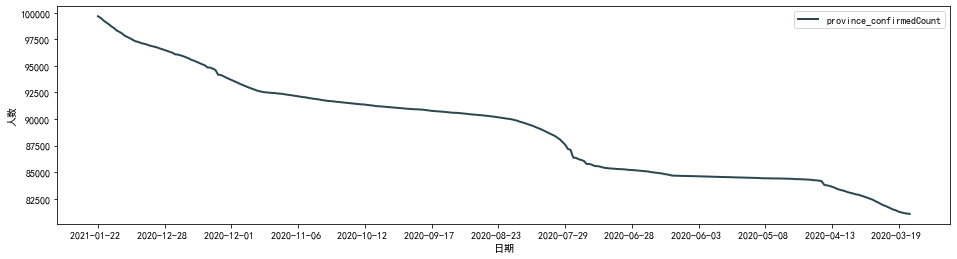

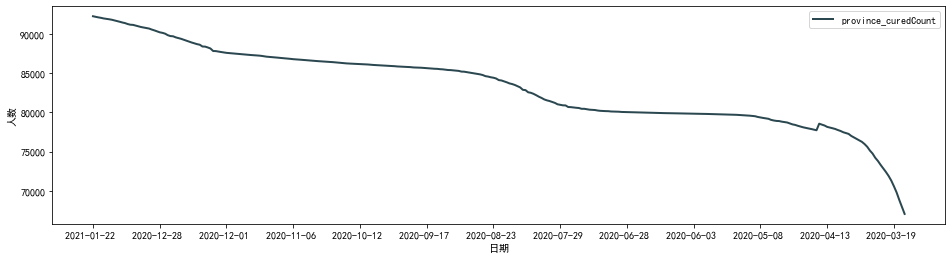

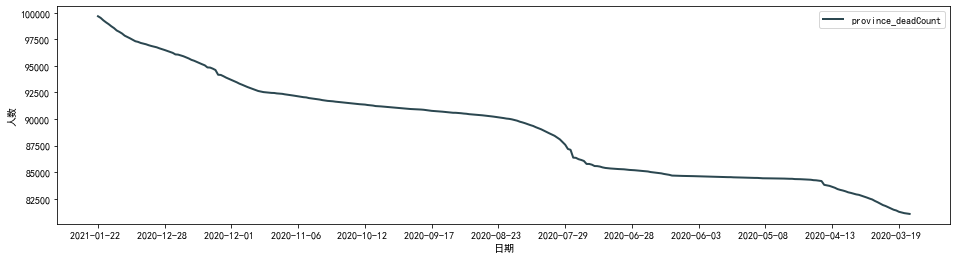

In [52]:

#画折线图表示
fig, axes = plt.subplots(1,1,figsize=(16, 4))
x=updatetime_a.index
y=updatetime_a.values
plot=axes.plot(x,y,color=dt_hex,linewidth=2,linestyle='-',label='province_confirmedCount')
axes.set_xticks(range(0,len(x),25))
plt.xlabel('日期',fontsize=10)
plt.ylabel('人数',fontsize=10)
axes.legend(loc=0,frameon=True)
plt.show()
#重复以上步骤，绘制治愈/死亡的折线图
list_b=china['province_curedCount']
#遍历时间将其改为字符串形式
list_updatetime=[]
for i in china.index:
    list_updatetime.append(str(i)[0:11])
updatetime_b=pd.DataFrame(list_b,index=list_updatetime)
updatetime_b.index.name='updatetime'
updatetime_b.columns=['province_curedCount']
updatetime_b.head()
#画折线图表示
fig, axes = plt.subplots(1,1,figsize=(16, 4))
x=updatetime_b.index
y=updatetime_b.values
plot=axes.plot(x,y,color=dt_hex,linewidth=2,linestyle='-',label='province_curedCount')
axes.set_xticks(range(0,len(x),25))
plt.xlabel('日期',fontsize=10)
plt.ylabel('人数',fontsize=10)
axes.legend(loc=0,frameon=True)
plt.show()
#绘制死亡人数图
list_c=china['province_deadCount']
#遍历时间将其改为字符串形式
list_updatetime=[]
for i in china.index:
    list_updatetime.append(str(i)[0:11])
updatetime_c=pd.DataFrame(list_a,index=list_updatetime)
updatetime_c.index.name='updatetime'
updatetime_c.columns=['province_deadCount']
updatetime_c.head()
#画折线图表示
fig, axes = plt.subplots(1,1,figsize=(16, 4))
x=updatetime_c.index
y=updatetime_c.values
plot=axes.plot(x,y,color=dt_hex,linewidth=2,linestyle='-',label='province_deadCount')
axes.set_xticks(range(0,len(x),25))
plt.xlabel('日期',fontsize=10)
plt.ylabel('人数',fontsize=10)
axes.legend(loc=0,frameon=True)
plt.show()
#分析：确诊与死亡人数的折线图显示出人数在逐渐增加，增速有加快的趋势；治愈人数虽然也是再增加，但是增速逐渐变慢

#### （二）你所在的省市情况如何？

In [53]:
myhome

,provinceName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,
2021-01-22,河北省,1252,0.0,405,7,石家庄,843.0,0.0,54.0,1.0
2021-01-21,河北省,1245,0.0,395,7,石家庄,842.0,0.0,54.0,1.0
2021-01-20,河北省,1222,0.0,384,7,石家庄,813.0,0.0,45.0,1.0
2021-01-19,河北省,1198,0.0,383,7,石家庄,801.0,0.0,45.0,1.0
2021-01-18,河北省,1171,0.0,379,7,石家庄,774.0,0.0,41.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-01-27,河北省,18,0.0,0,1,石家庄,7.0,0.0,0.0,0.0
2020-01-26,河北省,13,0.0,0,1,石家庄,5.0,0.0,0.0,0.0
2020-01-25,河北省,8,0.0,0,1,石家庄,4.0,0.0,0.0,0.0


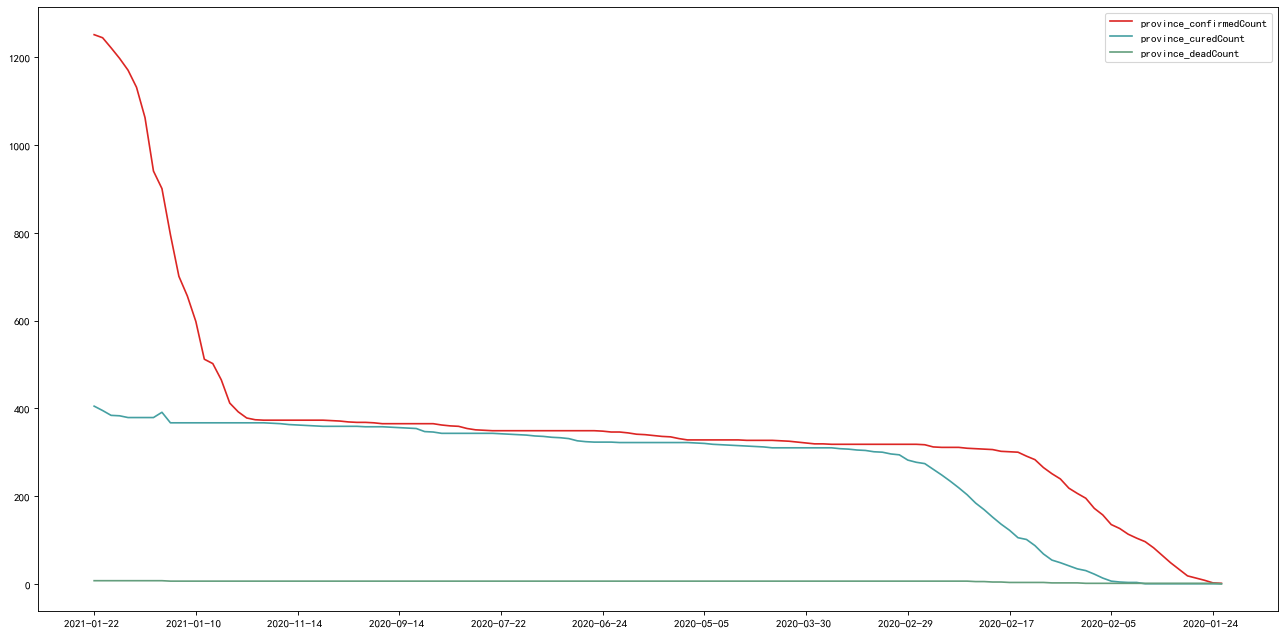

In [54]:
plt.figure( figsize=(20,10), dpi=80)
list_updatetime=[]
for i in myhome.index:
    list_updatetime.append(str(i)[0:11])
x = list_updatetime
y1=myhome['province_confirmedCount']
y2=myhome['province_curedCount']
y3=myhome['province_deadCount']
plt.plot(x,y1,color=r_hex,label='province_confirmedCount')
plt.plot(x,y2,color=tl_hex,label='province_curedCount')
plt.plot(x,y3,color=g_hex,label='province_deadCount')
x_major_locator = MultipleLocator(12)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.legend(loc=0,frameon=True)
plt.show()

#### （三）全球疫情态势如何？

1. 全球 TOP10 国家的疫情情况如何？

2. 各大洲情况对比？

3. 选一个你感兴趣的大洲，分析各国疫情之间的联系、分布、对比和构成情况。

> 提示：注意数据透视、分组和整合知识的运用

In [55]:
world

,updateTime,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,2021-01-22,北美洲,North America,美国,United States of America,美国,United States of America,971002,24632468,0.0,10845438,410378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-22,南美洲,South America,巴西,Brazil,巴西,Brazil,973003,8699814,0.0,7580741,214228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-22,欧洲,Europe,比利时,Belgium,比利时,Belgium,961001,686827,0.0,19239,20620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-22,欧洲,Europe,俄罗斯,Russia,俄罗斯,Russia,964006,3677352,0.0,3081536,68412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-22,欧洲,Europe,塞尔维亚,Republic of Serbia,塞尔维亚,Republic of Serbia,965013,436121,0.0,50185,5263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301542,2020-01-27,NaN,NaN,马来西亚,Malaysia,马来西亚,Malaysia,952007,3,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301543,2020-01-27,NaN,NaN,法国,France,法国,France,961002,3,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301544,2020-01-27,NaN,NaN,越南,Vietnam,越南,Vietnam,952011,2,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301545,2020-01-27,NaN,NaN,尼泊尔,Nepal,尼泊尔,Nepal,953005,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


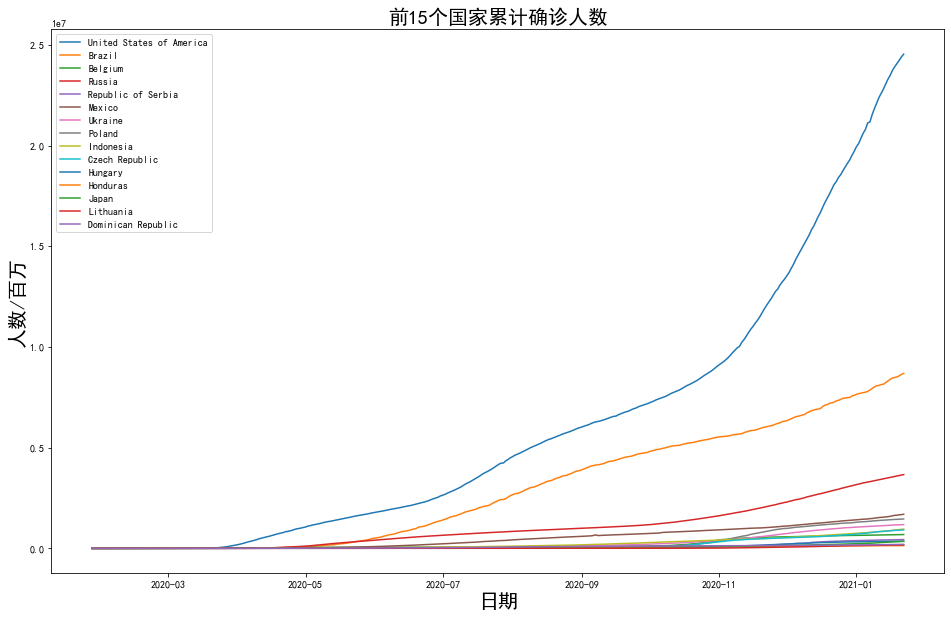

In [56]:
country = list(set(world['provinceEnglishName']))
date_y = []
for dt in world.loc[world['provinceEnglishName'] ==  country[0]]['updateTime']:
    date_y.append(str(dt))
date_y.sort()
for c in country:
    world.loc[world['provinceEnglishName'] == c].sort_values(by = 'updateTime')
world.dropna(subset=['provinceEnglishName'],inplace=True)
world.updateTime = pd.to_datetime(world.updateTime,format="%Y-%m-%d",errors='coerce').dt.date
world_confirmed = world.loc[world['provinceEnglishName'] == world.head(15)['provinceEnglishName'][0]].pivot_table(index='updateTime', columns='provinceEnglishName', values='province_confirmedCount',aggfunc=np.mean)
for i in world.head(15)['provinceEnglishName'][1:]:
    draft_c = world.loc[world['provinceEnglishName'] == i].pivot_table(index='updateTime', columns='provinceEnglishName', values='province_confirmedCount',aggfunc=np.mean)
    world_confirmed = pd.merge(world_confirmed,draft_c,on='updateTime', how='outer',sort=True)
world_confirmed.fillna(0,inplace=True,limit = 1)
world_confirmed.fillna(method="ffill",inplace=True)
world_confirmed
fig = plt.figure(figsize=(16,10))
plt.plot(world_confirmed)
plt.legend(world_confirmed.columns)
plt.title('前15个国家累计确诊人数',fontsize=20)
plt.xlabel('日期',fontsize=20)
plt.ylabel('人数/百万',fontsize=20);
plt.show()

#### （四）结合你的分析结果，对未来半年的疫情趋势给出你的判断，对个人和社会在抗击疫情方面有何建议？

### 附加分析(选做，但做的出彩会加分哦)

附加分析，所使用的库不限，比如可以使用seaborn、pyecharts等库。

童鞋们，自由发挥吧！！(实在没有idea，到百度疫情地图或其他疫情分析的站点激发激发灵感。)

比如，这样滴...

![](images/chinamap.png)

或者，这样滴...

![](images/worldmap.png)

或者，这样滴...

![](images/meiguitu.png)

少侠，等你来战！